---
## 3. CO2 배경대기농도와 사계절 길이 상관관계 계산

#### 3-0. 라이브러리 호출

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 3-1. CO2 배경대기 농도 데이터 호출

In [9]:
temp_co2 = pd.read_csv('./DB/co2_mm_mlo.csv')
temp_co2 = temp_co2[temp_co2['year'] >=1959].reset_index()
temp_co2.drop('index', axis=1, inplace=True)
temp_co2

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1959,1,1959.0411,315.58,315.55,-1,-9.99,-0.99
1,1959,2,1959.1260,316.48,315.86,-1,-9.99,-0.99
2,1959,3,1959.2027,316.65,315.38,-1,-9.99,-0.99
3,1959,4,1959.2877,317.72,315.41,-1,-9.99,-0.99
4,1959,5,1959.3699,318.29,315.49,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
775,2023,8,2023.6250,419.68,421.57,21,0.45,0.19
776,2023,9,2023.7083,418.51,421.96,18,0.30,0.14
777,2023,10,2023.7917,418.82,422.11,27,0.47,0.17
778,2023,11,2023.8750,420.46,422.43,21,0.91,0.38


In [10]:
temp_co2 = pd.read_csv('./DB/co2_mm_mlo.csv')
co2 = temp_co2.groupby('year')['average'].mean().reset_index()
co2.rename(columns={'average':'CO2(ppm)'}, inplace=True)
co2

,year,CO2(ppm)
0,1959,315.980833
1,1960,316.910000
2,1961,317.644167
3,1962,318.454167
4,1963,318.992500
...,...,...
60,2019,411.654167
61,2020,414.238333
62,2021,416.450833
63,2022,418.564167


#### 3-2. 사계절 길이 데이터 호출

In [11]:
season = pd.read_csv('./DB/4-season_2.csv')[4:]
season = season.drop('Unnamed: 0', axis=1).reset_index()
season.drop('index', axis=1, inplace=True)
season

,year,spring,summer,fall,winter
0,1963,82,108,66,109
1,1964,73,100,59,134
2,1965,79,112,57,117
3,1966,105,92,65,103
4,1967,81,104,59,121
...,...,...,...,...,...
56,2019,97,125,43,100
57,2020,99,114,62,91
58,2021,100,127,47,91
59,2022,87,115,65,98


#### 3-3. CO2 배경대기 농도와 사계절 길이의 상관관계 계산

In [12]:
merged_data = pd.merge(co2, season, on='year')
merged_data

,year,CO2(ppm),spring,summer,fall,winter
0,1963,318.992500,82,108,66,109
1,1964,319.616667,73,100,59,134
2,1965,320.035833,79,112,57,117
3,1966,321.369167,105,92,65,103
4,1967,322.180833,81,104,59,121
...,...,...,...,...,...,...
56,2019,411.654167,97,125,43,100
57,2020,414.238333,99,114,62,91
58,2021,416.450833,100,127,47,91
59,2022,418.564167,87,115,65,98


In [13]:
correlation = merged_data[['CO2(ppm)', 'spring', 'summer', 'fall', 'winter']].corr().loc['CO2(ppm)', ['CO2(ppm)', 'spring', 'summer', 'fall', 'winter']]
correlation_2d = correlation.values.reshape(1, -1)
correlation_2d

array([[ 1.        ,  0.28096855,  0.65753156, -0.23753536, -0.42094691]])

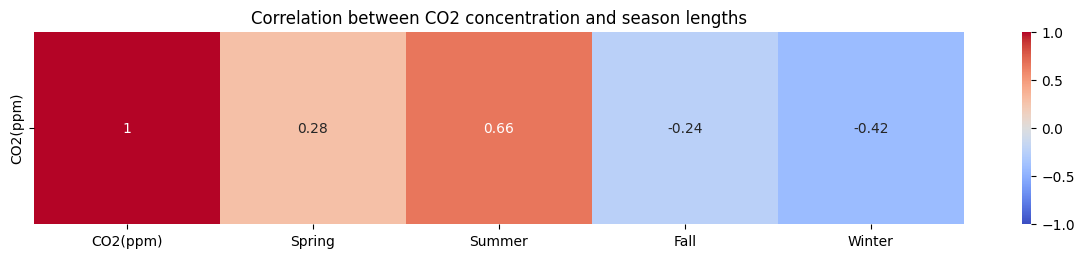

In [14]:
plt.figure(figsize=(15, 2.5))
sns.heatmap(correlation_2d, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            xticklabels=['CO2(ppm)', 'Spring', 'Summer', 'Fall', 'Winter'],
            yticklabels=['CO2(ppm)'])
plt.title('Correlation between CO2 concentration and season lengths')
plt.show()